You will notice a lot of commented code. This is because there are two versions of the code: code version #1 and code version #2. The final and used code version is code version #2. All the commented code is from code version #1. It was kept, since it will be used in another notebook for data visualization.

**Importing Libraries**

In this project, the libraries used are pandas, numpy, matplotlib, keras, and scikit learn. Pandas was mainly used for creating data frames, importing the dataset, and manipulating the dataset. Numpy was used for array manipulation (mainly changing dimennsions to fit the specifications of certain methods). The matplotlib library is used for data visualization. Keras is used to build the deep learning models, save their results, and export them. Scikit learn was mainly used to calculate the accuracy metrics of the models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras import optimizers 
from keras import callbacks
from keras.models import model_from_json
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
warnings.filterwarnings("ignore")

**Importing Data**

The "close" value of the original dataset was shifted by one position down, since sliding window is going to be used, and the prediction is going to be to the "following" closing hour given all other porperties of the current hour. After shifitng, the raw is renamed as "Close". The last raw is dropped, since no prediction can occur on that using the sliding window. The "date" column type is an object, so it had to be parsed into a date type and set as an index column (Determines the time-step of the sequence). The commented code was used to read the dataset (in code version #1).

In [ ]:

df=pd.read_csv('Final_DataSet_10k.csv', index_col='date', parse_dates=['date'])
#df=pd.read_csv('Final_DataSet_10k.csv')

df['Close']=df['close'].shift(-1,fill_value=0)
df.drop(df.tail(1).index,inplace=True)
df = df.drop(columns=['close'])

df

,open,high,low,Volume BTC,Volume USDT,Close
date,,,,,,
2017-08-17 04:00:00,16199.91,16199.91,4261.32,44.5100,190952.85,4315.32
2017-08-17 05:00:00,4308.83,4328.69,4291.37,23.2300,100304.82,4324.35
2017-08-17 06:00:00,4315.32,4345.45,4309.37,7.2300,31282.31,4349.99
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4.4400,19241.06,4360.69
2017-08-17 08:00:00,4349.99,4377.85,4333.32,0.9499,4139.70,4444.00
...,...,...,...,...,...,...
2018-10-07 18:00:00,6589.18,6598.00,6589.18,175.4700,1157235.59,6584.00
2018-10-07 19:00:00,6594.27,6599.00,6579.01,223.6100,1473657.80,6587.20
2018-10-07 20:00:00,6584.00,6587.90,6579.01,164.6800,1084241.92,6588.54


**Data Partitioning**

The dataset is partitioned into 70% training, 20% validation, and 10% testing. The commented code was an attempt to keep a copy of the each of the training, validation, and testing datasets since they will be normalized later (in code version #1).

In [ ]:
train_size = int(len(df)*0.7)
validation_size= int(len(df)*0.9)
train_dataset,validation_dataset,test_dataset = df.iloc[:train_size],df.iloc[train_size:validation_size],df.iloc[validation_size:]
#normal_train_dataset=train_dataset.copy()
#normal_validation_dataset=validation_dataset.copy()
#normal_test_dataset=test_dataset.copy()

#normal_test_dataset

**Plotting Data**

Plotting all data and dividing it into training, validation, and testing on the plot. Also, the size of each dataset is outputted. The commented code was used before to figure out the shape (dimensions) of each of the three datasets.

Volume of all data:  9999
Volume of train data:  6999
Volume of validation data: 2000
Volume of test data:  1000


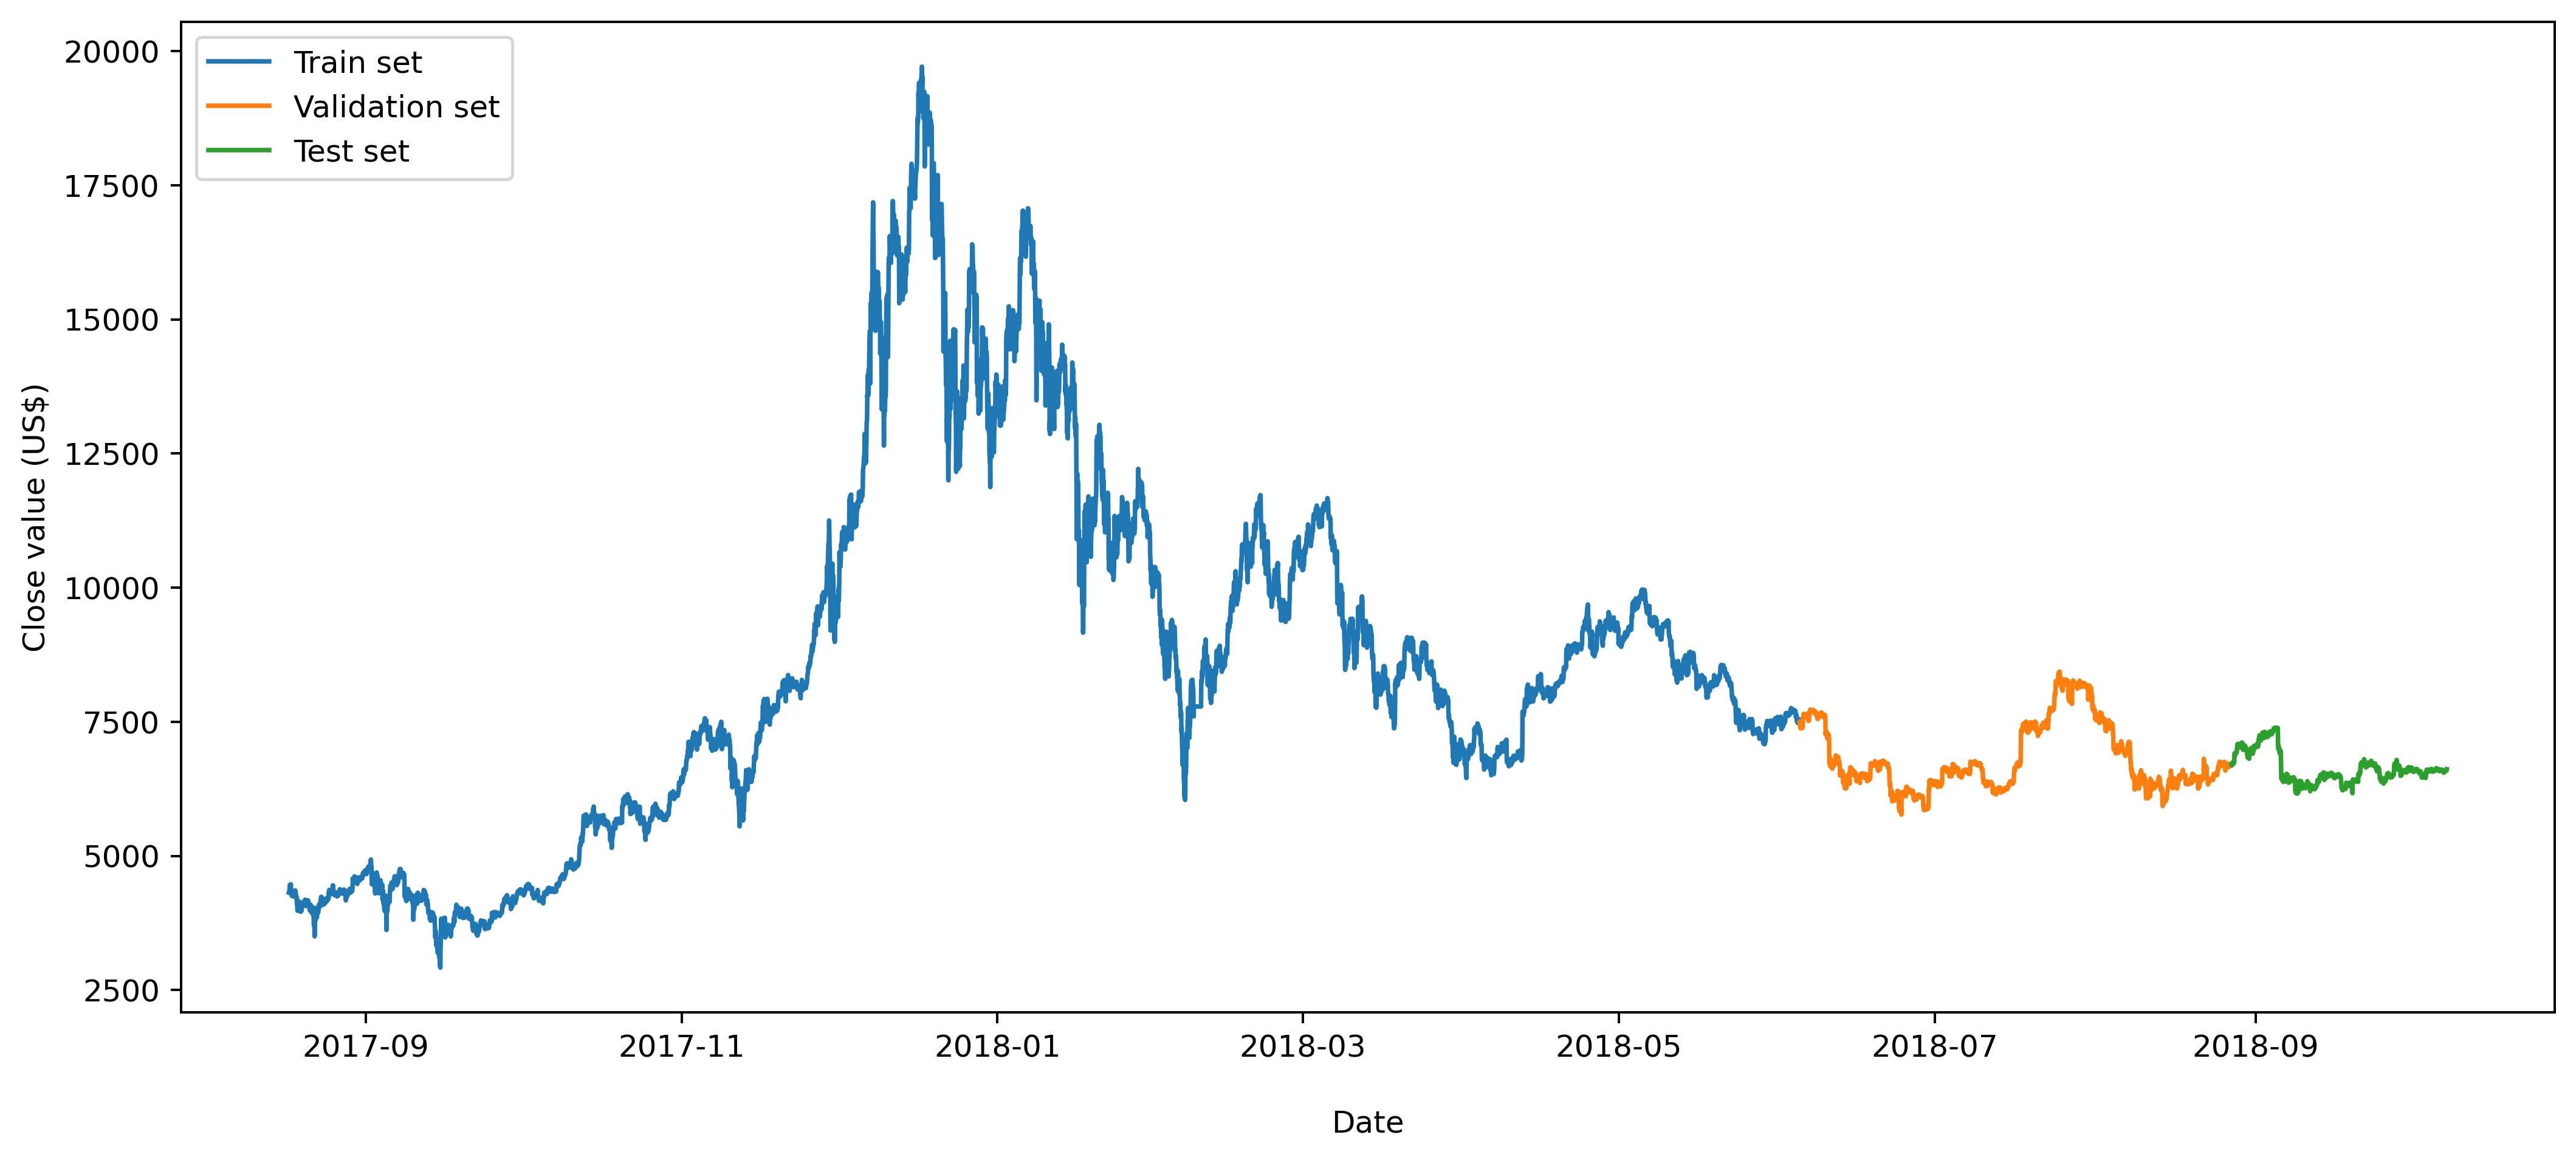

In [ ]:
plt.figure(figsize = (14, 6))
plt.rcParams['figure.dpi'] = 360
plt.plot(train_dataset.Close)
plt.plot(validation_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('\nDate')
plt.ylabel('Close value (US$)')
plt.legend(['Train set', 'Validation set', 'Test set'], loc='upper left')
print('Volume of all data: ',len(df))
#print('Volume of train data: ', train_dataset.shape)
print('Volume of train data: ', len(train_dataset))
#print('Volume of validation data:', validation_dataset.shape)
print('Volume of validation data:', len(validation_dataset))
#print('Volume of test data: ', test_dataset.shape)
print('Volume of test data: ', len(test_dataset))

**Data Normalization and Splitting**

The MinMaxScaler was used to normalize the data between 0 and 1.  Before normalizing each dataset (training, validation, and testing), datasets were split into X and Y. The X datasets contain all features except of the "Close" feature (the feature to be predicted). This separation of features led us to the usage of two different scalers, one for X datasets (input) and one for  Y datasets (output). This was a crucial step, since it allowed for a correct reversing of normalization (which was a problem in code version #1). After each X and Y for each of the 3 datasets is normalized, the results are stored in new values. The commented code was just a little experiment to play with the dimensions of the results.

In [ ]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

x_train=train_dataset.drop('Close', axis=1)
y_train=train_dataset.loc[:,['Close']]

x_validation=validation_dataset.drop('Close', axis=1)
y_validation=validation_dataset.loc[:,['Close']]

x_test=test_dataset.drop('Close', axis=1)
y_test=test_dataset.loc[:,['Close']]

input_scaler = scaler_x.fit(x_train)
output_scaler = scaler_y.fit(y_train)

train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(x_train)

validation_y_norm = output_scaler.transform(y_validation)
validation_x_norm = input_scaler.transform(x_validation)

test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(x_test)

test_inverse = scaler_y.inverse_transform(test_y_norm)

#back_to_normal= []

#test_inverse[2,0]

#for i in range (len(test_inverse)-25):

  #A=[]
  #A.append(test_inverse[i,0])
  #back_to_normal.append(A)


#back_to_normal
test_x_norm

array([[0.22634168, 0.22455706, 0.2323412 , 0.17801557, 0.13787662],
       [0.22574849, 0.22346914, 0.23143113, 0.16378772, 0.12649405],
       [0.22533933, 0.22294625, 0.23113236, 0.12260268, 0.09460125],
       ...,
       [0.21827819, 0.21591602, 0.22479892, 0.01869498, 0.01418451],
       [0.21846878, 0.21623593, 0.22488079, 0.01127625, 0.00856035],
       [0.21854858, 0.21615937, 0.22498118, 0.01316868, 0.00999778]])

**Data Normalization**

This is the normalization method used in code version #1. This way of normalization (not using two separate scalars, one for input and one for output) led to an incorrect reversing of normalization.

In [ ]:
#df_norm = df.copy()
#scaler = MinMaxScaler(feature_range=(-1,1))

#df_norm['Close'] = scaler.fit_transform(df[['Close']])
#df_norm['open'] = scaler.fit_transform(df_norm[['open']])
#df_norm['high'] = scaler.fit_transform(df_norm[['high']])
#df_norm['low'] = scaler.fit_transform(df_norm[['low']])
#df_norm['Volume BTC'] = scaler.fit_transform(df_norm[['Volume BTC']])
#df_norm['Volume USDT'] = scaler.fit_transform(df_norm[['Volume USDT']])

#normal_train_dataset=train_dataset.copy()

#train_dataset['Close'] = scaler.fit_transform(train_dataset[['Close']])
#train_dataset['open'] = scaler.fit_transform(train_dataset[['open']])
#train_dataset['high'] = scaler.fit_transform(train_dataset[['high']])
#train_dataset['low'] = scaler.fit_transform(train_dataset[['low']])
#train_dataset['Volume BTC'] = scaler.fit_transform(train_dataset[['Volume BTC']])
#train_dataset['Volume USDT'] = scaler.fit_transform(train_dataset[['Volume USDT']])

#normal_validation_dataset=validation_dataset.copy()

#validation_dataset['Close'] = scaler.fit_transform(validation_dataset[['Close']])
#validation_dataset['open'] = scaler.fit_transform(validation_dataset[['open']])
#['high'] = scaler.fit_transform(validation_dataset[['high']])
#validation_dataset['low'] = scaler.fit_transform(validation_dataset[['low']])
#validation_dataset['Volume BTC'] = scaler.fit_transform(validation_dataset[['Volume BTC']])
#validation_dataset['Volume USDT'] = scaler.fit_transform(validation_dataset[['Volume USDT']])

#normal_test_dataset=test_dataset.copy()

#test_dataset['Close'] = scaler.fit_transform(test_dataset[['Close']])
#test_dataset['open'] = scaler.fit_transform(test_dataset[['open']])
#test_dataset['high'] = scaler.fit_transform(test_dataset[['high']])
#test_dataset['low'] = scaler.fit_transform(test_dataset[['low']])
#test_dataset['Volume BTC'] = scaler.fit_transform(test_dataset[['Volume BTC']])
#test_dataset['Volume USDT'] = scaler.fit_transform(test_dataset[['Volume USDT']])

**Plotting Normalized Data**

This commented code will be used in another notebook to visualize the entirety of the original dataset normalized.

In [ ]:
#fig = plt.figure(figsize=(14, 6))
#plt.plot(df_norm.Close)
#plt.xlabel('\nDate')
#plt.title('Data Normalized\n')
#plt.show()

**Plotting Normalized Training Data**

This commented code will be used in another notebook to visualize the normalized training data.

In [ ]:
#fig = plt.figure(figsize=(14, 6))
#plt.plot(train_dataset.Close)
#plt.xlabel('\nDate')
#plt.title('Training Data Normalized\n')
#plt.show()

**Plotting Normalized Validation Data**

This commented code will be used in another notebook to visualize the normalized validation data.

In [ ]:
#fig = plt.figure(figsize=(14, 6))
#plt.plot(validation_dataset.Close)
#plt.xlabel('\nDate')
#plt.title('Validation Data Normalized\n')
#plt.show()

**Plotting Normalized Testing Data**

This commented code will be used in another notebook to visualize the normalized testing data.

In [ ]:
#fig = plt.figure(figsize=(14, 6))
#plt.plot(test_dataset.Close)
#plt.xlabel('\nDate')
#plt.title('Testing Data Normalized\n')
#plt.show()

**Splitting Predictors From Outcome Variables Normalized**

This was used for splitting the 3 datasets into X and Y in code version #1. Very similar to code version #2, but different order of execution.

In [ ]:
#x_train=train_dataset.drop('Close', axis=1)
#y_train=train_dataset.loc[:,['Close']]

#x_validation=validation_dataset.drop('Close', axis=1)
#y_validation=validation_dataset.loc[:,['Close']]

#x_test=test_dataset.drop('Close', axis=1)
#y_test=test_dataset.loc[:,['Close']]


**Splitting Predictors From Outcome Variables Not Normalized**

This commented code was used to split the data but without normalization (it was used in a failed attempt to produce the code flow of code version #2).

In [ ]:
#x_train_normal=normal_train_dataset.drop('Close', axis=1)
#y_train_normal=normal_train_dataset.loc[:,['Close']]

#x_validation_normal=normal_validation_dataset.drop('Close', axis=1)
#y_validation_normal=normal_validation_dataset.loc[:,['Close']]

#x_test_normal=normal_test_dataset.drop('Close', axis=1)
#y_test_normal=normal_test_dataset.loc[:,['Close']]

**Creating a 3-D Dimensional Dataset Using Sliding Window**

Each of the X and Y datasets created above need to be transformed into 3-D datasets since GRU and LSTM only accept datasets with a 3-D dimension. The 3-D dimension represents (batch, timestep, feature). Moreover, this code determines the lookback period of the models (referred to as "lag"). The loockback period used for the 10k dataset is 2 hours. After executing the sliding window, the y_test dataset is set back into a 1D dataset and the normalization is reversed since it will be used in the actual prediction. 1D becuase the prediction values will also be 1D. Both need to be of the same dimension in order to visualize them using matplotlib.

In [ ]:
def sliding_window (data, close_data, lag=1 ):

  data_array= []
  close_data_array= []

  for i in range (len(data)-lag):
     time_step= data [i:i+lag:]
     data_array.append(time_step)
     close_data_array.append(close_data[i+lag:i+lag+1])

  return np.array(data_array), np.array(close_data_array)

LAG=2



x_train , y_train=  sliding_window(train_x_norm, train_y_norm, LAG)
x_validation, y_validation= sliding_window(validation_x_norm, validation_y_norm, LAG)
x_test, y_test= sliding_window(test_x_norm, test_y_norm, LAG)

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_validation.shape: ', x_validation.shape)
print('y_validation.shape: ', y_validation.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

test_1D= y_test [:, 0, 0]

M=[]

for i in range (len(test_1D)):

  D=[]
  D.append(test_1D[i])
  M.append(D)



y_test=scaler_y.inverse_transform(M)
x_test

x_train.shape:  (6997, 2, 5)
y_train.shape:  (6997, 1, 1)
x_validation.shape:  (1998, 2, 5)
y_validation.shape:  (1998, 1, 1)
x_test.shape:  (998, 2, 5)
y_test.shape:  (998, 1, 1)


array([[[0.22634168, 0.22455706, 0.2323412 , 0.17801557, 0.13787662],
        [0.22574849, 0.22346914, 0.23143113, 0.16378772, 0.12649405]],

       [[0.22574849, 0.22346914, 0.23143113, 0.16378772, 0.12649405],
        [0.22533933, 0.22294625, 0.23113236, 0.12260268, 0.09460125]],

       [[0.22533933, 0.22294625, 0.23113236, 0.12260268, 0.09460125],
        [0.22497722, 0.22357835, 0.23179265, 0.10146922, 0.07845279]],

       ...,

       [[0.2185867 , 0.21651548, 0.22540663, 0.0199199 , 0.01513944],
        [0.21888985, 0.21657483, 0.22479892, 0.0253849 , 0.01927901]],

       [[0.21888985, 0.21657483, 0.22479892, 0.0253849 , 0.01927901],
        [0.21827819, 0.21591602, 0.22479892, 0.01869498, 0.01418451]],

       [[0.21827819, 0.21591602, 0.22479892, 0.01869498, 0.01418451],
        [0.21846878, 0.21623593, 0.22488079, 0.01127625, 0.00856035]]])

**Creating a 3-Dimensional Dataset**

This was used to create a sliding window in code version #1. A failed attempt.

In [ ]:
#lag=96

#def threeD_dataset (data, len_data, lag):
 #   X, Y = [], []
    
  #  for i in range(lag,len_data):
     #   X.append(data[i-lag:i,0])
      #  Y.append(data[i,0])
        
   # return np.array(X), np.array(Y)

#array_train = np.array(train_dataset)
#array_validation = np.array(validation_dataset)
#array_test = np.array(test_dataset)

#x_train, y_train= threeD_dataset(array_train, len(array_train), lag)
#x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],5))

#x_validation, y_validation= threeD_dataset(array_validation, len(array_validation), lag)
#x_validation=np.reshape(x_validation, (x_validation.shape[0], x_validation.shape[1],5))

#x_test, y_test= threeD_dataset(array_test, len(array_test), lag)
#x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],5))

#print('x_train shape: ', x_train.shape)
#print('x_validation shape:', x_validation.shape)
#print('X_test shape: ', x_test.shape)
#print('y_train shape: ', y_train.shape)
#print('y_validation shape:', y_validation.shape) 
#print('y_test shape: ', y_test.shape)

**GRU Model**

The GRU Model implemented for code version #1. The model had good results, but not the best and desired. Also, it was executing using the wrong input (although it was working well???)

In [ ]:
#learning_rate=0.00001
#hidden_unit=128
#batch_size=96
#epoch=200


#regressorGRU = Sequential()

#regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2]), activation = 'sigmoid'))
#regressorGRU.add(Dropout(0.1))

#regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'sigmoid'))
#regressorGRU.add(Dropout(0.1))

#regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'sigmoid'))
#regressorGRU.add(Dropout(0.1))

#regressorGRU.add(Dense(units=1))

#my_callbacks= callbacks.EarlyStopping(patience=3)

#regressorGRU.compile(optimizer="adam",loss='mean_squared_error')
#pred = regressorGRU.fit(x_train, y_train, validation_data=(x_validation,y_validation), batch_size=batch_size, epochs=epoch)


**THE GRU Model**

The GRU Model consists of 4 layers. An input layer and a deep layer, each consist of 72 nodes, and an output layer that consists of a single node representing the single feature predicted which is "Close" price. Dropout was added to the deep layers to optimize their performance. The other parameters were tunned to 0.001 learning rate, an epoch size of 100, and a batach size of 128 (6999/128 = 55 number of batches or iterations each of 128 samples). The model is compiled using the MSE as a loss function and Adam optimizer. Early stopping is used with a patience of 40. I noticed that I need to be patient with the model, give it time, and it will give me the needed results. There is still room to possibly manipulate the batch size when changing the window size for further experimentation on the affect of that on the perofrmance.

In [ ]:
learning_rate_GRU=0.001
neurons_GRU=72
batch_size_GRU=128
epoch_GRU=100

GRU_model=Sequential()

GRU_model.add(GRU(units=neurons_GRU, return_sequences=True, input_shape=[x_train.shape[1], x_train.shape[2]],
                  activation = 'sigmoid'))

#GRU_model.add(GRU(units=neurons, return_sequences=True, activation = 'sigmoid'))
GRU_model.add(Dropout(0.2))

GRU_model.add(GRU(units=neurons_GRU, return_sequences=True, activation = 'sigmoid'))
GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))


GRU_model.compile(loss="mean_squared_error", optimizer="adam")
early_stop_GRU = callbacks.EarlyStopping(monitor = 'val_loss', patience = 40)
history_GRU = GRU_model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=epoch_GRU, batch_size=batch_size_GRU, shuffle=False, callbacks=[early_stop_GRU])






Epoch 1/100
55/55 [==============================] - 6s 20ms/step - loss: 0.0690 - val_loss: 0.0170
Epoch 2/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0938 - val_loss: 0.0054
Epoch 3/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0736 - val_loss: 0.0030
Epoch 4/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0711 - val_loss: 0.0014
Epoch 5/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0729 - val_loss: 0.0048
Epoch 6/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0749 - val_loss: 0.0131
Epoch 7/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0743 - val_loss: 0.0226
Epoch 8/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0708 - val_loss: 0.0273
Epoch 9/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0663 - val_loss: 0.0278
Epoch 10/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0623 - val_loss: 0.0264

**GRU-Exporting the Model**

In case the model perofrmed really well, the model itself is exported into a JSON file and the weights of the model are exported in a h5 file.

In [ ]:
loss_training_GRU=history_GRU.history['loss'][-1]
loss_validation_GRU=history_GRU.history['loss'][-1]
#if (loss_training_GRU <0.01 and loss_validation_GRU<0.001 ):
GRU_model_json=GRU_model.to_json()
with open("GRU_model_10k_batch128.json", "w") as json_file:
  json_file.write(GRU_model_json)

GRU_model.save_weights("GRU_model_10k_batch128.h5")
print("saved the GRU model to disk")



saved the GRU model to disk


**GRU-Visualizing The Trian Loss and The Validation Loss**

prints out a table that shows the "before the last" loss of training and validation while training the model. It also shows the learning rate used.

In [ ]:
learning_rate_index_GRU=learning_rate_GRU
training_loss_GRU=history_GRU.history['loss'][-1]
validation_loss_GRU=history_GRU.history['val_loss'][-1]
learning_rate_index_GRU= pd.DataFrame(data=[[learning_rate_index_GRU, training_loss_GRU, validation_loss_GRU]], columns = ['Learning Rate',
                                                                                                           'Training Loss', 'Validation Loss'])
learning_rate_index_GRU



,Learning Rate,Training Loss,Validation Loss
0,0.001,0.002304,0.000087


**GRU-Plotting Validation Loss and Training Loss**

Usually when the validation loss is higher than the training loss means that the model is overfitting. If both training loss and validation loss are high, it means the model is underfitting. But in this case the validation loss is less than the training loss, what does that mean? This is most probably because regularization (e.g. droput) was used in training and not in validation. It is not a bad thing to have the validation loss lower than the training loss due to regularization. Regularization is used for the purpose of obtaining better validation/testing accuracy and generalize better the performance of the model outside the validation/testing sets. Another reason for the phenomena observes is that training loss is measured during the epoch, while the validation loss is measured after the epoch.

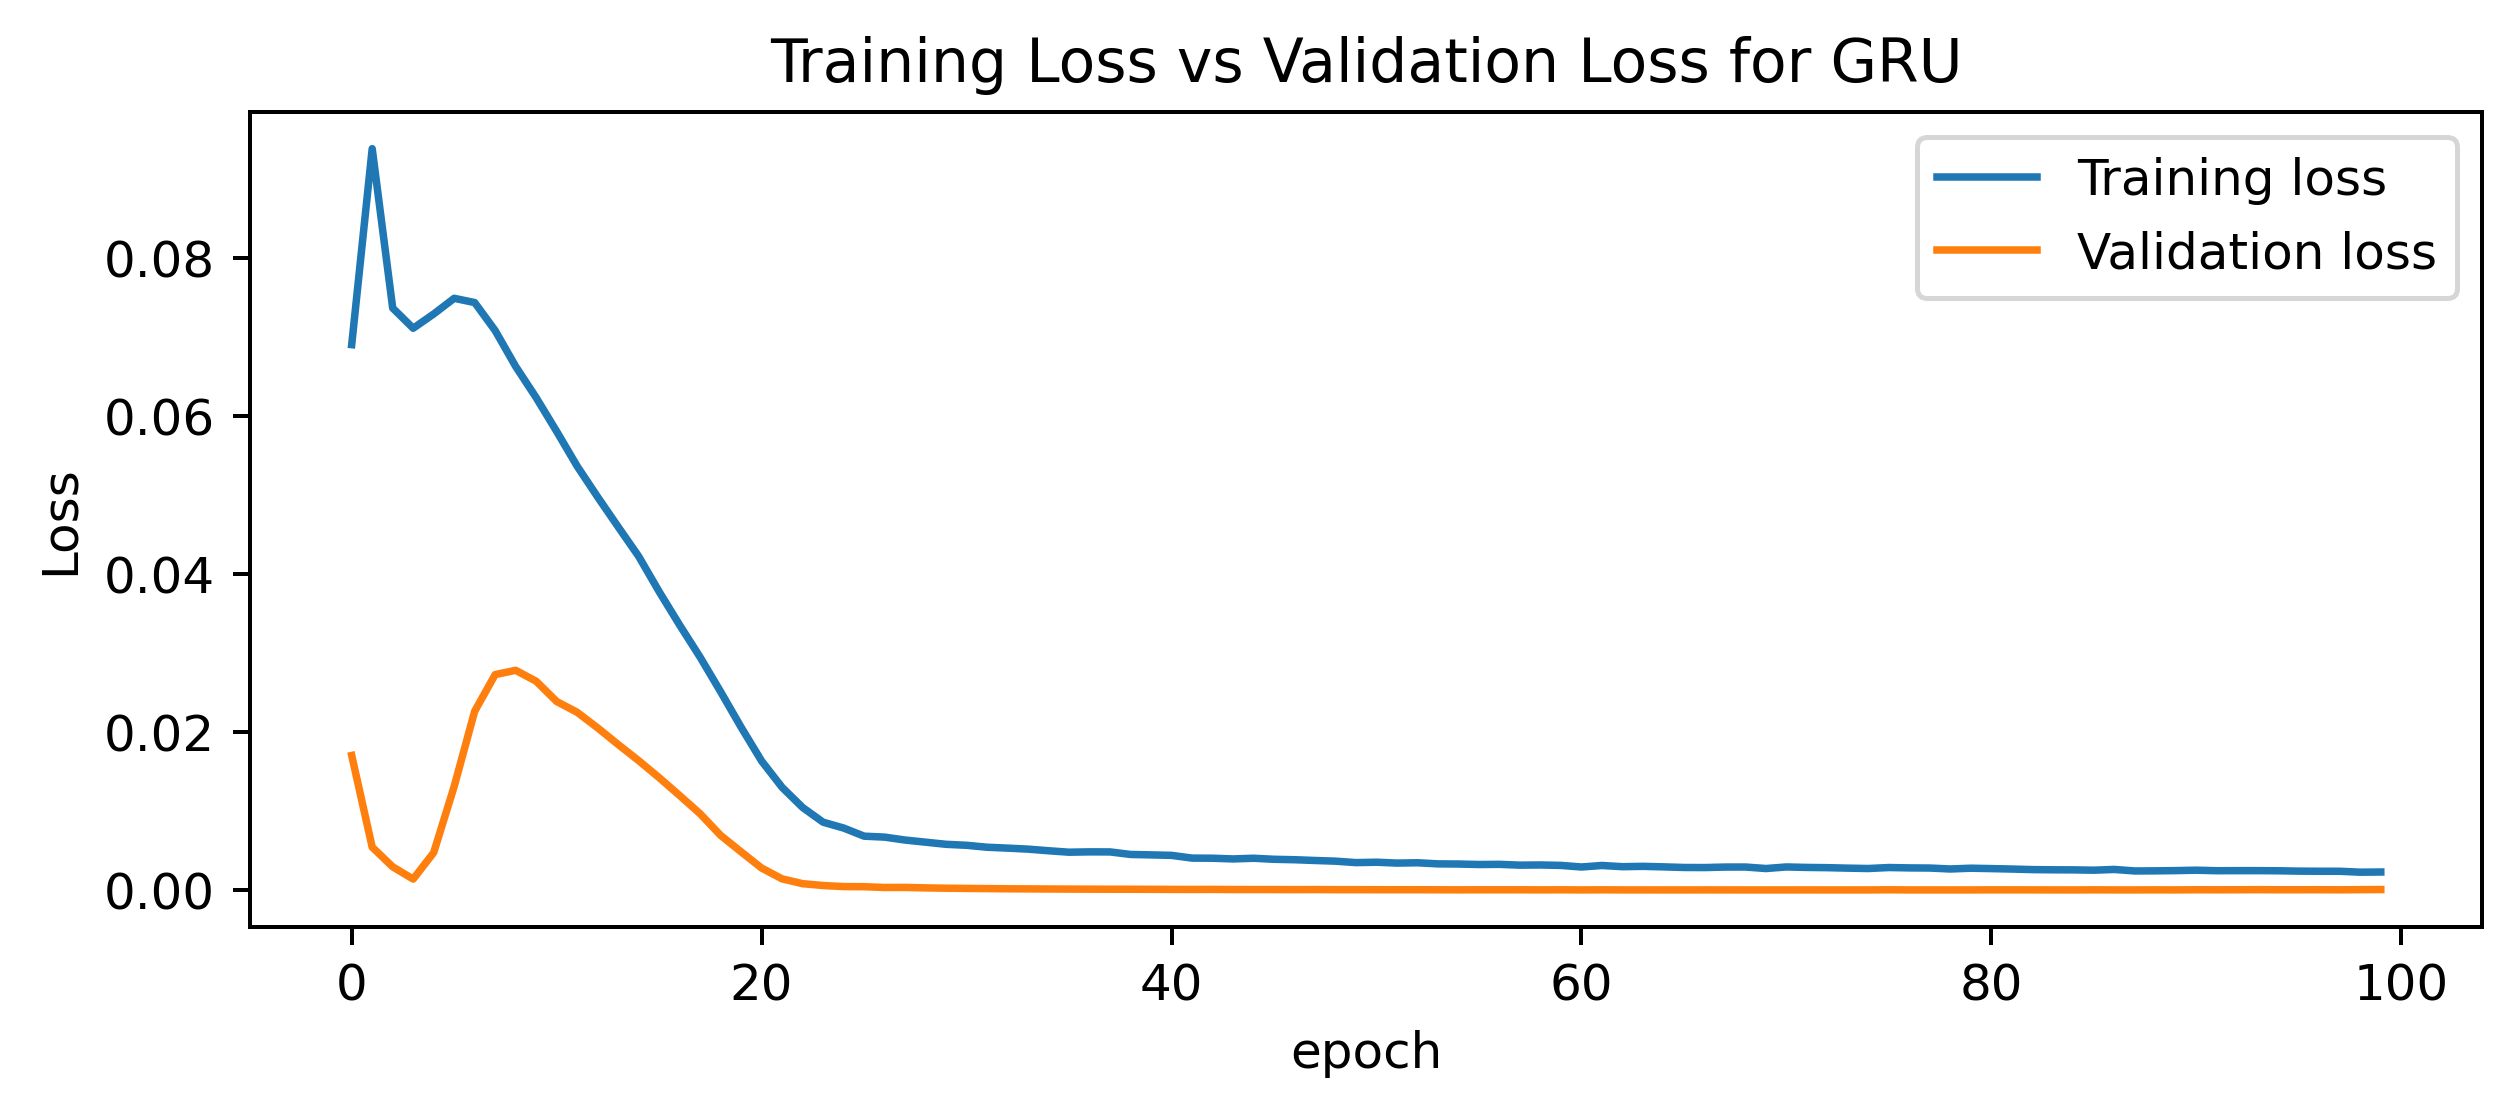

In [ ]:
plt.figure(figsize = (8, 3))
plt.rcParams['figure.dpi'] = 360
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('Training Loss vs Validation Loss for GRU')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

**GRU-Prediction**

Evaluating the performance of the model by predicting the "Close" value using the testing dataset (X dataset). After that, the results are stored and transformed into a 1D dataset to visualize them by plotting. Also, the normalized values are reversed back to the original non-normalized values for better visualization and evaluation of the perofrmance of the model.

In [ ]:
prediction_GRU = GRU_model.predict(x_test)

prediction_1D_GRU = prediction_GRU [:, 0, 0]

C_GRU=[]

for i in range (len(prediction_1D_GRU)):

  D=[]
  D.append(prediction_1D_GRU[i])
  C_GRU.append(D)



prediction_GRU=scaler_y.inverse_transform(C_GRU)

**GRU-Visualizing The Prediction Results**

The predicted values and the actual values are put in a table in order to help better compare the differences between the actual and predicted values.


In [ ]:
dataCompare_GRU = pd.DataFrame()
dataTest_GRU= np.array(df['Close'][validation_size+LAG:]) #make sure it matches with the window size
dataPredict_GRU= np.array(prediction_GRU)

dataCompare_GRU['Testing Data']=dataTest_GRU
dataCompare_GRU['Predicted Data']=dataPredict_GRU

dataCompare_GRU


,Testing Data,Predicted Data
0,6713.95,6700.693181
1,6713.01,6688.478017
2,6686.29,6683.946932
3,6717.00,6689.226359
4,6720.57,6693.911816
...,...,...
993,6584.00,6582.798907
994,6587.20,6588.654540
995,6588.54,6593.184374
996,6590.02,6592.001188


**GRU-Plotting The Actual Values and The Predicted Values**

As observed, the predicted values are very accurate in predicting the movement of the price (up and down), however they are slightly higher than the actual values. This is because of the reguralization used in the training set (dropout) and not in the other sets (in order to better generalize). Moreover, it is slightly visible that the pattern of the predicted values are shifted a little bit to the left. This  shift is actually due to usage of sliding window.

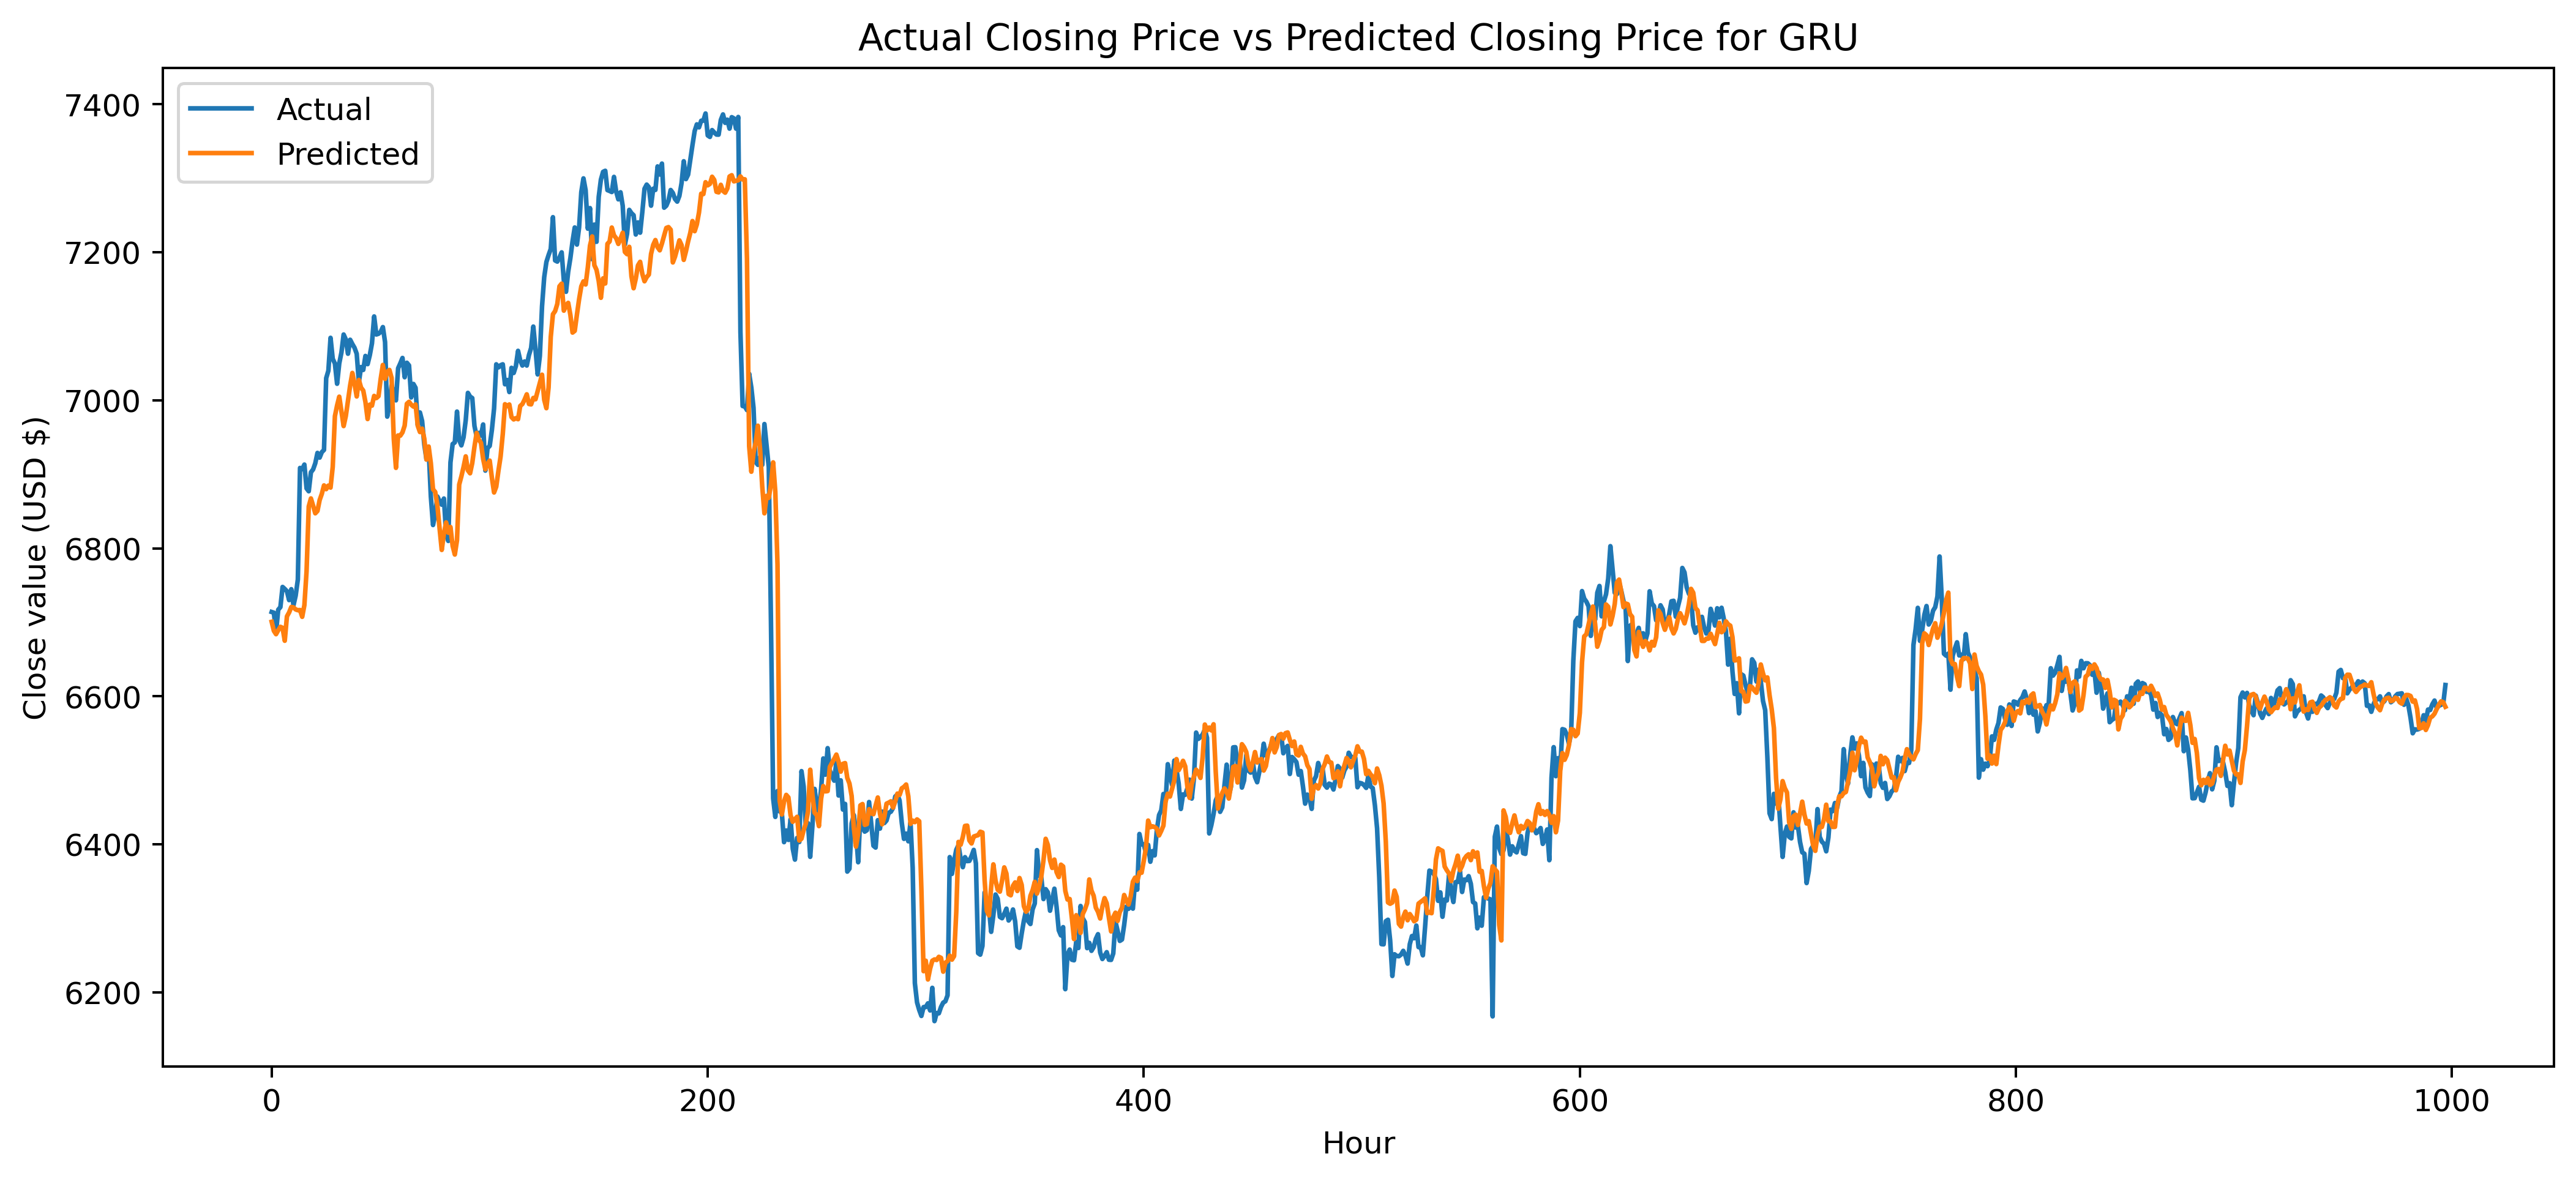

In [ ]:
plt.figure(figsize=(14, 6))
plt.rcParams['figure.dpi'] = 360
range_future_GRU = len(prediction_GRU)
plt.plot(np.arange(range_future_GRU), np.array(y_test), label='Actual')
plt.plot(np.arange(range_future_GRU), np.array(prediction_GRU),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for GRU')
plt.legend(loc='upper left')
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**GRU-Percent Accuracy**

This accuracy metrics is not used in evaluating regression models. It is just used here to get a sense of performance, but it will not be reported.

In [ ]:
percent_tot_GRU=0
for i in range (len(y_test)):
  a=y_test[0]
  result_a=a[0]
  b=prediction_GRU[0]
  result_b=b[0]

  percent= ((result_b*100)/result_a)
  if percent >100:
    percent = 100 - (percent - 100)
  percent_tot_GRU+=percent

percent_tot_GRU= percent_tot_GRU/len(y_test)

print('GRU Accuracy %: ', percent_tot_GRU)



GRU Accuracy %:  99.80254813764991


**GRU-Regression Accuracy Metrics**

In order to measure the performance of the model when exposed to new data, MAE, MSE, RMSE, and MAPE are calculated for the normalized values of the predicted values and the actual values.

In [ ]:

mae_norm_GRU = mean_absolute_error(M, C_GRU)

mse_norm_GRU = mean_squared_error(M, C_GRU)

rmse_norm_GRU = mean_squared_error(M, C_GRU, squared=False)

mape_norm_GRU =mean_absolute_percentage_error(M, C_GRU)

print('GRU MAE-Normalized: ', mae_norm_GRU)
print ('GRU MSE-Normalized: ', mse_norm_GRU)
print('GRU RMSE-Normalized: ', rmse_norm_GRU)
print('GRU MAPE-Normalized: ', mape_norm_GRU)

GRU MAE-Normalized:  0.0026695760464498283
GRU MSE-Normalized:  1.501830694753263e-05
GRU RMSE-Normalized:  0.003875346042295143
GRU MAPE-Normalized:  0.01193313800734157


**GRU-Regression Accuracy Metrics Unlocked**

In the following code, MSE, RMSE, and MAE are calculated using the numpy library and using values that are not normalized. This helps in making sense of the results.

In [ ]:
errors_GRU = prediction_GRU - y_test
mse_GRU = np.square(errors_GRU).mean()
rmse_GRU = np.sqrt(mse_GRU)
mae_GRU = np.abs(errors_GRU).mean()


print('GRU MAE: {:.4f}'.format(mae_GRU))
print('GRU MSE: {:.4f}'.format(mse_GRU))
print('GRU RMSE: {:.4f}'.format(rmse_GRU))


GRU MAE: 44.8235
GRU MSE: 4233.9745
GRU RMSE: 65.0690


**GRU-Model Imported**

This allows us to export a model that is already saved in a JSON file and its corresnponding weights in a h5 file. The model is restored and can be used to make predictionsn visualize results, and do some data manipulation.

In [ ]:
json_file_GRU = open ('GRU_model_10k_batch128.json', 'r')
loaded_model_json_GRU = json_file_GRU.read()
json_file_GRU.close()
loaded_model_GRU = model_from_json(loaded_model_json_GRU)

loaded_model_GRU.load_weights("GRU_model_10k_batch128.h5")
print("loaded GRU model from disk")

prediction_again_GRU=loaded_model_GRU.predict(x_test)

prediction_1D_again_GRU= prediction_again_GRU [:, 0, 0]

C_again_GRU=[]

for i in range (len(prediction_1D_again_GRU)):

  D=[]
  D.append(prediction_1D_again_GRU[i])
  C_again_GRU.append(D)



prediction_again_GRU=scaler_y.inverse_transform(C_again_GRU)


prediction_again_GRU

loaded GRU model from disk


array([[6700.69318069],
       [6688.47801652],
       [6683.9469317 ],
       [6689.22635858],
       [6693.91181553],
       [6692.55624305],
       [6675.04138597],
       [6708.01847618],
       [6713.33418176],
       [6720.70151051],
       [6720.21637669],
       [6717.37788098],
       [6716.35307019],
       [6716.60602032],
       [6707.4069924 ],
       [6723.11466971],
       [6768.95318539],
       [6856.5772602 ],
       [6867.4361013 ],
       [6857.64135206],
       [6847.314682  ],
       [6850.52221968],
       [6865.20208383],
       [6873.62099455],
       [6885.06154587],
       [6879.96701527],
       [6884.77682061],
       [6882.05216496],
       [6909.93322339],
       [6978.62657093],
       [6993.07350079],
       [7004.95740288],
       [6984.7977033 ],
       [6965.23972978],
       [6978.6916224 ],
       [6999.39800449],
       [7020.28002555],
       [7037.04629038],
       [7022.37818553],
       [7005.2231131 ],
       [7027.58680639],
       [7017.152

**The LSTM Model**

The LSTM has the same architecture and parameters as the GRU model.

In [ ]:
learning_rate_LSTM=0.001
neurons_LSTM=72
batch_size_LSTM=128
epoch_LSTM=100

LSTM_model=Sequential()

LSTM_model.add(LSTM(units=neurons_LSTM, return_sequences=True, input_shape=[x_train.shape[1], x_train.shape[2]],
                  activation = 'sigmoid'))

#LSTM_model.add(LSTM(units=neurons, return_sequences=True, activation = 'sigmoid'))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=neurons_LSTM, return_sequences=True, activation = 'sigmoid'))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(units=1))


LSTM_model.compile(loss="mean_squared_error", optimizer="adam")
early_stop_LSTM = callbacks.EarlyStopping(monitor = 'val_loss', patience = 40)
history_LSTM = LSTM_model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=epoch_LSTM, batch_size=batch_size_LSTM, shuffle=False, callbacks=[early_stop_LSTM])

Epoch 1/100
55/55 [==============================] - 5s 18ms/step - loss: 0.1470 - val_loss: 0.0032
Epoch 2/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0912 - val_loss: 0.0057
Epoch 3/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0855 - val_loss: 0.0034
Epoch 4/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0803 - val_loss: 0.0020
Epoch 5/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0818 - val_loss: 0.0036
Epoch 6/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0832 - val_loss: 0.0087
Epoch 7/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0824 - val_loss: 0.0166
Epoch 8/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0814 - val_loss: 0.0232
Epoch 9/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0793 - val_loss: 0.0270
Epoch 10/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0762 - val_loss: 0.0294

**LSTM-Exporting the Model**

In case the model perofrmed really well, the model itself is exported into a JSON file and the weights of the model are exported in a h5 file.

In [ ]:
loss_training_LSTM=history_LSTM.history['loss'][-1]
loss_validation_LSTM=history_LSTM.history['loss'][-1]
#if (loss_training_GRU <0.01 and loss_validation_GRU<0.001 ):
LSTM_model_json=LSTM_model.to_json()
with open("LSTM_model_10k_lr001.json", "w") as json_file:
  json_file.write(LSTM_model_json)

LSTM_model.save_weights("LSTM_model_10k_lr001.h5")
print("saved the LSTM model to disk")

saved the LSTM model to disk


**LSTM-Visualizing The Trian Loss and The Validation Loss**

prints out a table that shows the "before the last" loss of training and validation while training the model. It also shows the learning rate used.

In [ ]:
learning_rate_index_LSTM=learning_rate_LSTM
training_loss_LSTM=history_LSTM.history['loss'][-1]
validation_loss_LSTM=history_LSTM.history['val_loss'][-1]
learning_rate_index_LSTM= pd.DataFrame(data=[[learning_rate_index_LSTM, training_loss_LSTM, validation_loss_LSTM]], columns = ['Learning Rate',
                                                                                                           'Training Loss', 'Validation Loss'])
learning_rate_index_LSTM

,Learning Rate,Training Loss,Validation Loss
0,0.001,0.004061,0.000205


**LSTM-Plotting Validation Loss and Training Loss**

Usually when the validation loss is higher than the training loss means that the model is overfitting. If both training loss and validation loss are high, it means the model is overfitting. But in this case the validation loss is less than the training loss, what does that mean? This is most probably because regularization (e.g. droput) was used in training and not in validation. It is not a bad thing to have the validation loss lower than the training loss due to regularization. Regularization is used for the purpose of obtaining better validation/testing accuracy and generalize better the performance of the model outside the validation/testing sets. Another reason for the phenomena observes is that training loss is measured during the epoch, while the validation loss is measured after the epoch.

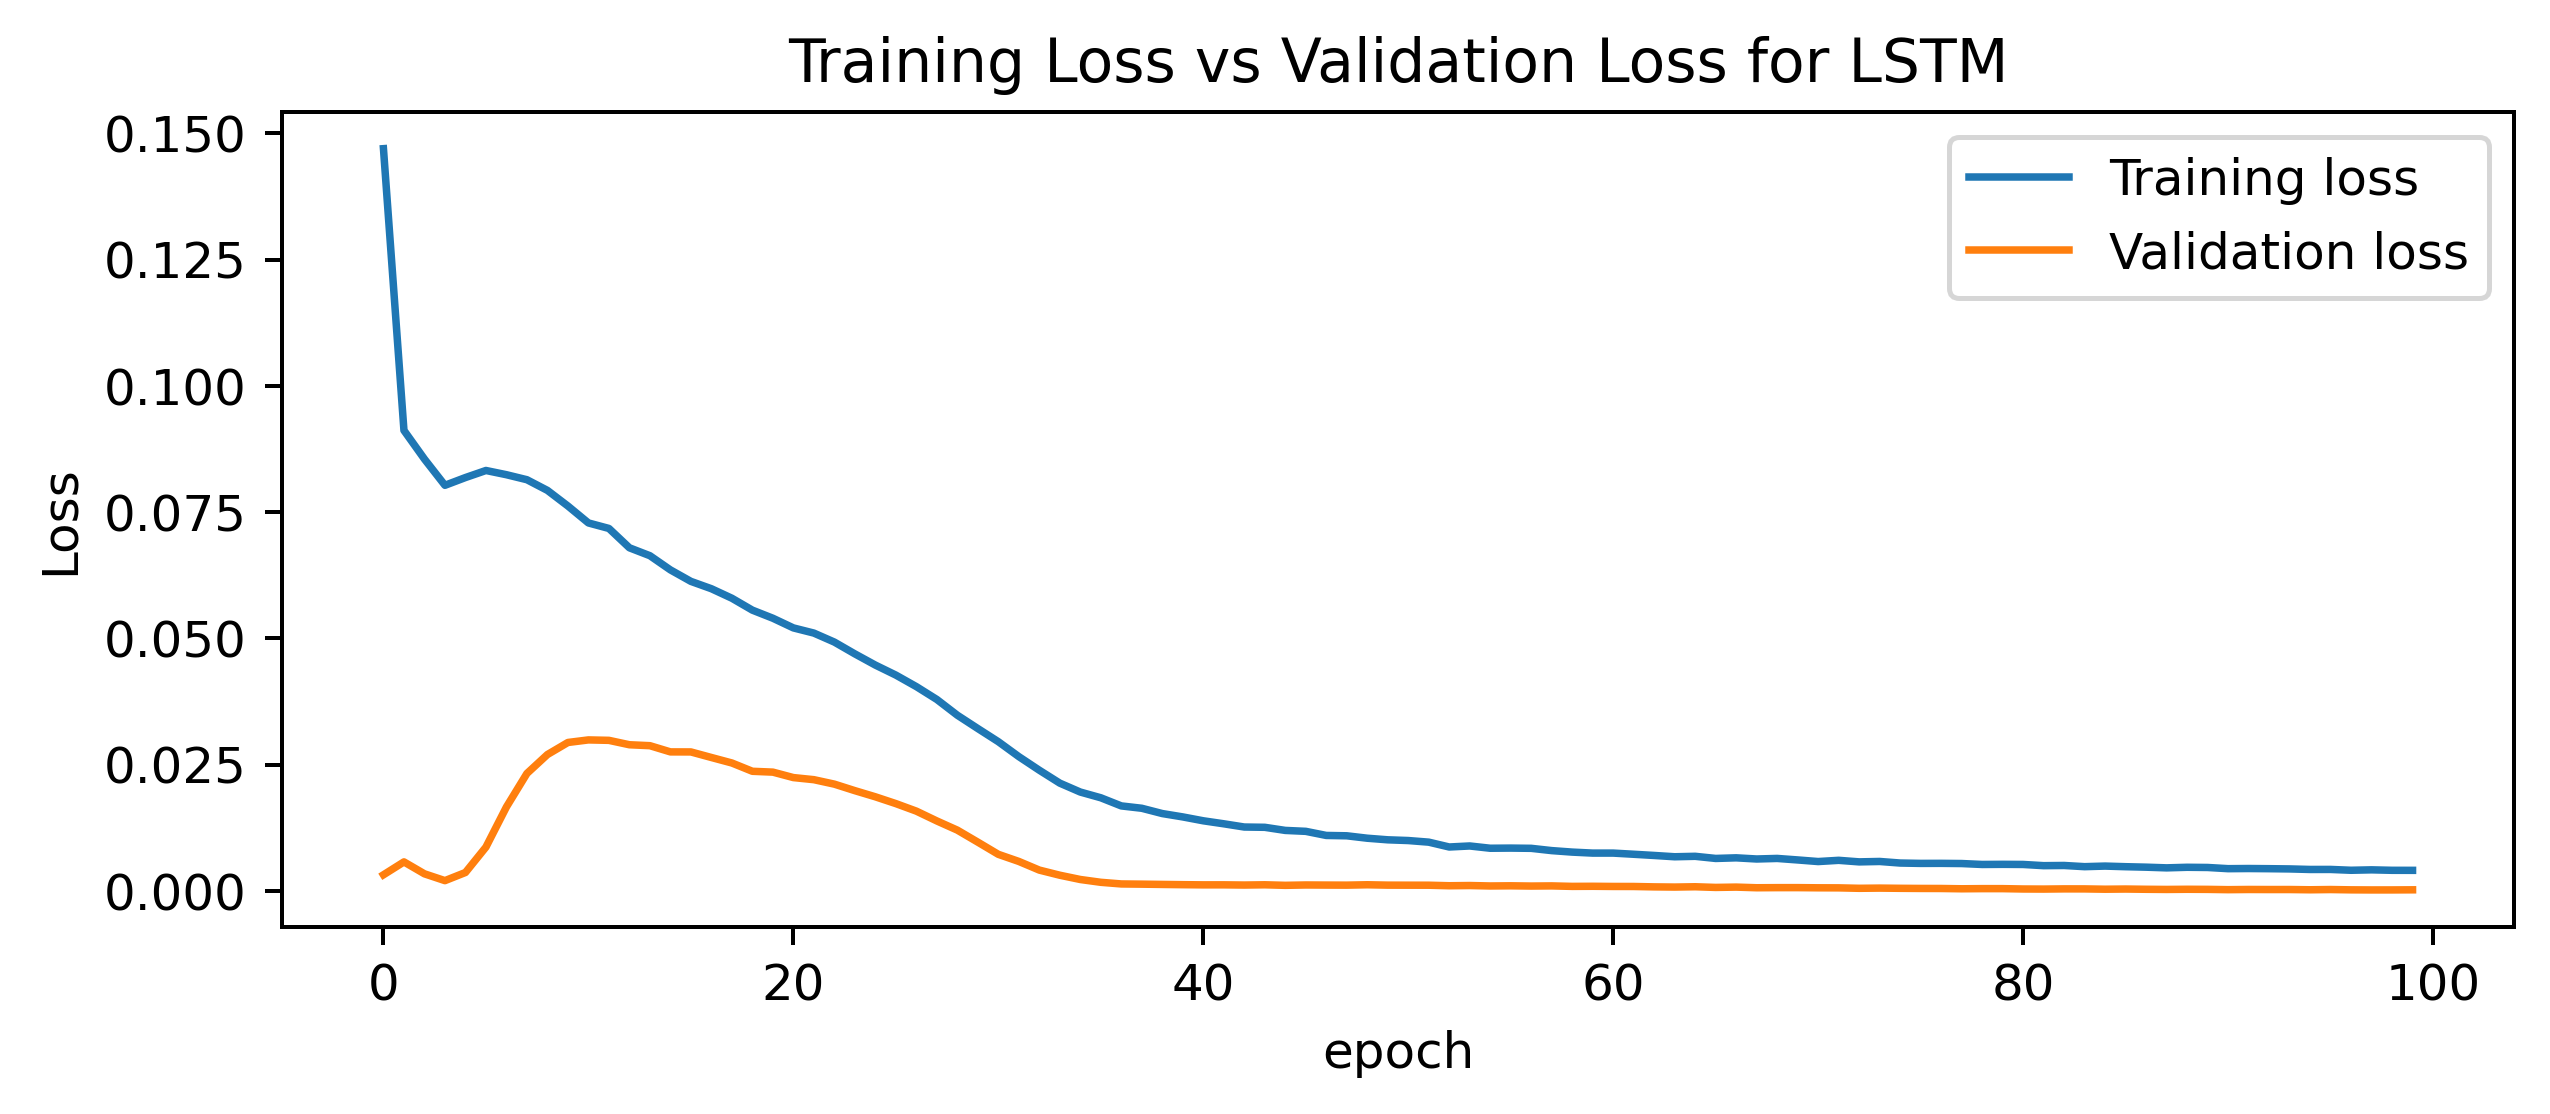

In [ ]:
plt.figure(figsize = (8, 3))
plt.rcParams['figure.dpi'] = 360
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('Training Loss vs Validation Loss for LSTM')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

**LSTM-Prediction**

Evaluating the performance of the model by predicting the "Close" value using the testing dataset (X dataset). After that, the results are stored and transformed into a 1D dataset to visualize them by plotting. Also, the normalized values are reversed back to the original non-normalized values for better visualization and evaluation of the perofrmance of the model.

In [ ]:
prediction_LSTM = LSTM_model.predict(x_test)

prediction_1D_LSTM = prediction_LSTM [:, 0, 0]

C_LSTM=[]

for i in range (len(prediction_1D_LSTM)):

  D=[]
  D.append(prediction_1D_LSTM[i])
  C_LSTM.append(D)



prediction_LSTM=scaler_y.inverse_transform(C_LSTM)

**LSTM-Visualizing The Prediction Results**

The predicted values and the actual values are put in a table in order to help better compare the differences between the actual and predicted values.

In [ ]:
dataCompare_LSTM = pd.DataFrame()
dataTest_LSTM= np.array(df['Close'][validation_size+LAG:]) #make sure it matches with the window size
dataPredict_LSTM= np.array(prediction_LSTM)

dataCompare_LSTM['Testing Data']=dataTest_LSTM
dataCompare_LSTM['Predicted Data']=dataPredict_LSTM

dataCompare_LSTM

,Testing Data,Predicted Data
0,6713.95,6784.550025
1,6713.01,6778.893049
2,6686.29,6793.801094
3,6717.00,6809.379419
4,6720.57,6773.618126
...,...,...
993,6584.00,6737.849327
994,6587.20,6739.232922
995,6588.54,6752.592241
996,6590.02,6748.501255


**LSTM-Plotting The Actual Values and The Predicted Values**

As observed, the predicted values are very accurate in predicting the movement of the price (up and down), however they are slightly higher than the actual values. This is because of the reguralization used in the training set (dropout) and not in the other sets (in order to better generalize). Moreover, it is slightly visible that the pattern of the predicted values are shifted a little bit to the left. This  shift is actually due to usage of sliding window.

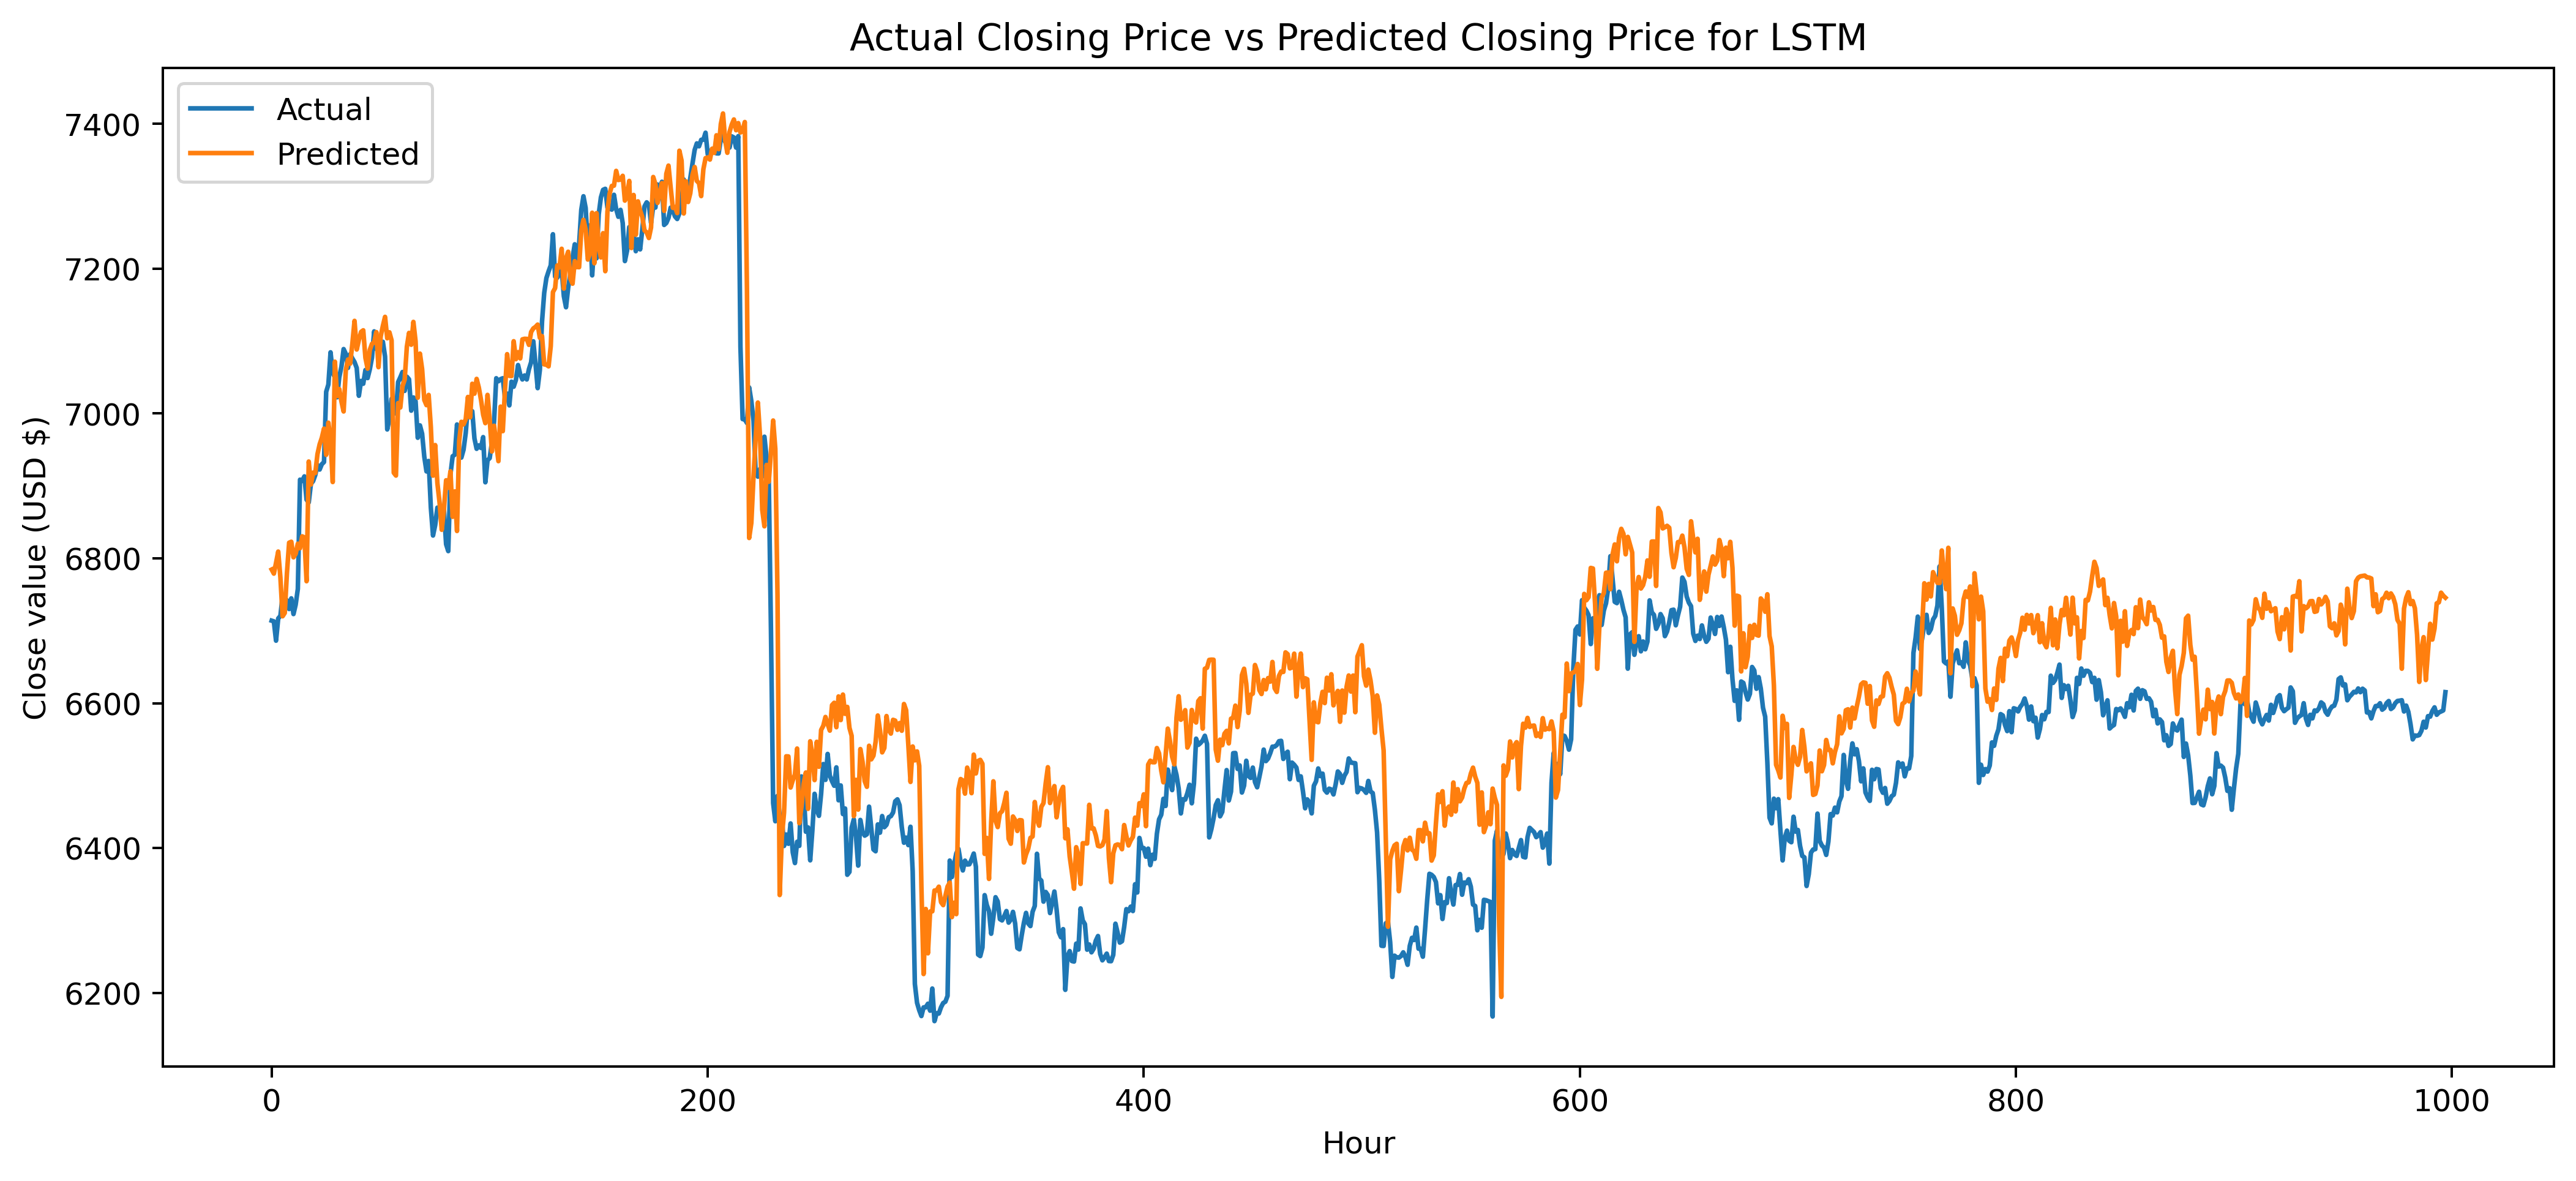

In [ ]:
plt.figure(figsize=(14, 6))
plt.rcParams['figure.dpi'] = 360
range_future_LSTM = len(prediction_LSTM)
plt.plot(np.arange(range_future_LSTM), np.array(y_test), label='Actual')
plt.plot(np.arange(range_future_LSTM), np.array(prediction_LSTM),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for LSTM')
plt.legend(loc='upper left')
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**LSTM-Percent Accuracy**

This accuracy metrics is not used in evaluating regression models. It is just used here to get a sense of performance, but it will not be reported.

In [ ]:
percent_tot_LSTM=0
for i in range (len(y_test)):
  a=y_test[0]
  result_a=a[0]
  b=prediction_LSTM[0]
  result_b=b[0]

  percent= ((result_b*100)/result_a)
  if percent >100:
    percent = 100 - (percent - 100)
  percent_tot_LSTM+=percent

percent_tot_LSTM= percent_tot_LSTM/len(y_test)

print('LSTM Accuracy %: ', percent_tot_LSTM)

LSTM Accuracy %:  98.948457688715


**LSTM-Regression Accuracy Metrics**

In order to measure the performance of the model when exposed to new data, MAE, MSE, RMSE, and MAPE are calculated for the normalized values of the predicted values and the actual values.

In [ ]:
mae_norm_LSTM = mean_absolute_error(M, C_LSTM)

mse_norm_LSTM = mean_squared_error(M, C_LSTM)

rmse_norm_LSTM = mean_squared_error(M, C_LSTM, squared=False)

mape_norm_LSTM =mean_absolute_percentage_error(M, C_LSTM)

print('LSTM MAE-Normalized: ', mae_norm_LSTM)
print ('LSTM MSE-Normalized: ', mse_norm_LSTM)
print('LSTM RMSE-Normalized: ', rmse_norm_LSTM)
print('LSTM MAPE-Normalized: ', mape_norm_LSTM)

LSTM MAE-Normalized:  0.006011150405920303
LSTM MSE-Normalized:  4.888414537237643e-05
LSTM RMSE-Normalized:  0.006991719772157379
LSTM MAPE-Normalized:  0.027957034124932736


**LSTM-Regression Accuracy Metrics Unlocked**

In the following code, MSE, RMSE, and MAE are calculated using the numpy library and using values that are not normalized. This helps in making sense of the results.

In [ ]:
errors_LSTM = prediction_LSTM - y_test
mse_LSTM = np.square(errors_LSTM).mean()
rmse_LSTM = np.sqrt(mse_LSTM)
mae_LSTM = np.abs(errors_LSTM).mean()


print('LSTM MAE: {:.4f}'.format(mae_LSTM))
print('LSTM MSE: {:.4f}'.format(mse_LSTM))
print('LSTM RMSE: {:.4f}'.format(rmse_LSTM))

LSTM MAE: 100.9302
LSTM MSE: 13781.4618
LSTM RMSE: 117.3945


**LSTM-Model Imported**

This allows us to export a model that is already saved in a JSON file and its corresnponding weights in a h5 file. The model is restored and can be used to make predictionsn visualize results, and do some data manipulation.

In [ ]:
json_file_LSTM = open ('LSTM_model_10k_lr001.json', 'r')
loaded_model_json_LSTM = json_file_LSTM.read()
json_file_LSTM.close()
loaded_model_LSTM = model_from_json(loaded_model_json_LSTM)

loaded_model_LSTM.load_weights("LSTM_model_10k_lr001.h5")
print("loaded LSTM model from disk")

prediction_again_LSTM=loaded_model_LSTM.predict(x_test)

prediction_1D_again_LSTM= prediction_again_LSTM [:, 0, 0]

C_again_LSTM=[]

for i in range (len(prediction_1D_again_LSTM)):

  D=[]
  D.append(prediction_1D_again_LSTM[i])
  C_again_LSTM.append(D)



prediction_again_LSTM=scaler_y.inverse_transform(C_again_LSTM)


prediction_again_LSTM

loaded LSTM model from disk


array([[6784.55002501],
       [6778.89304943],
       [6793.8010941 ],
       [6809.37941907],
       [6773.61812611],
       [6719.98744557],
       [6724.60484868],
       [6779.78025135],
       [6821.61760145],
       [6822.92163315],
       [6801.4053603 ],
       [6806.16237387],
       [6820.23175503],
       [6813.90850231],
       [6830.423068  ],
       [6828.87083994],
       [6768.4150096 ],
       [6933.70352954],
       [6901.98368402],
       [6918.2795767 ],
       [6917.8297208 ],
       [6943.83254323],
       [6957.46507877],
       [6966.42116448],
       [6979.13372217],
       [6942.89905469],
       [6987.33145791],
       [6963.82611138],
       [6905.36310769],
       [7071.52882163],
       [7024.17460679],
       [7033.71115174],
       [7016.56833901],
       [7002.81195548],
       [7059.49930434],
       [7074.55821837],
       [7068.8391937 ],
       [7096.22886336],
       [7127.93244602],
       [7088.32936358],
       [7101.44899333],
       [7112.668